In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
num_men = num_women = 20

In [53]:
men_preferences = np.random.rand(num_men, num_women)
women_preferences = np.random.rand(num_women, num_men)

In [54]:
men_preferences[:5, :5]

array([[0.68116571, 0.42188698, 0.9663461 , 0.14808523, 0.90500486],
       [0.26157808, 0.28383349, 0.76397916, 0.96282994, 0.40588812],
       [0.23471595, 0.3670919 , 0.24238288, 0.74132077, 0.45730416],
       [0.93369337, 0.57164611, 0.18803043, 0.32740311, 0.38456067],
       [0.73196328, 0.4068183 , 0.53571174, 0.72529455, 0.03147355]])

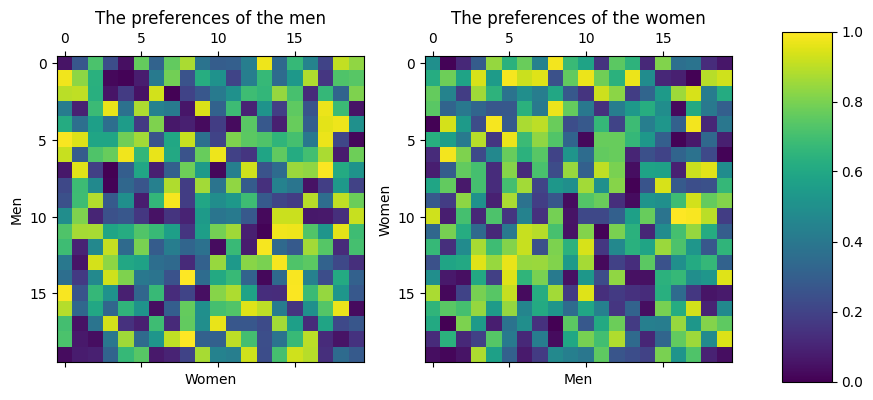

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

im = axs[0].matshow(men_preferences, vmin=0, vmax=1)
axs[0].set_title('The preferences of the men')
axs[0].set_ylabel('Men')
axs[0].set_xlabel('Women')
axs[1].matshow(women_preferences, vmin=0, vmax=1)
axs[1].set_title('The preferences of the women')
axs[1].set_ylabel('Women')
axs[1].set_xlabel('Men')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

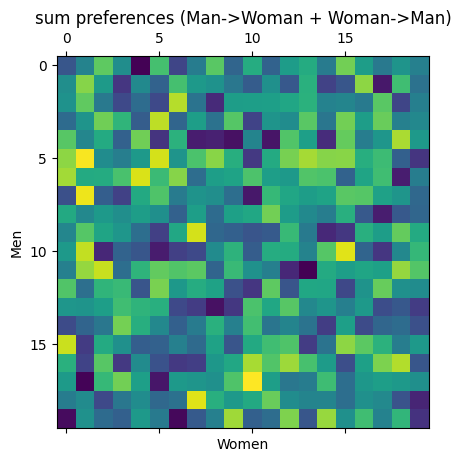

In [33]:
plt.matshow(men_preferences + women_preferences)
plt.title("sum preferences (Man->Woman + Woman->Man)")
plt.xlabel("Women")
plt.ylabel("Men")
plt.show()

In [34]:
men_preferences.argsort(axis=1)

array([[ 4,  0, 17,  3,  1, 10, 11,  6, 14,  9, 12, 16, 15,  2,  7,  5,
        19,  8, 18, 13],
       [ 4,  3,  5, 17, 11,  8, 14,  6, 12, 10, 15,  9,  2, 13, 18, 19,
         7,  1, 16,  0],
       [ 7,  5,  3, 16,  4,  8,  9, 18, 10, 11,  2, 13, 17, 12, 15, 19,
        14,  0,  1,  6],
       [19,  8,  1, 12, 14, 16, 10,  4,  7,  0,  6, 13,  2, 18, 11, 15,
         5,  9,  3, 17],
       [11,  9,  7,  8, 14,  5, 10, 13, 16,  3,  1, 19,  4,  2,  0, 12,
        15,  6, 17, 18],
       [19, 10, 18,  6,  9, 16,  3,  2,  7, 14, 15, 13, 12,  4, 11,  5,
         8,  1, 17,  0],
       [18, 12, 11,  8,  1, 13,  7, 15,  5, 16,  2, 14,  3,  9, 19, 17,
         0,  6, 10,  4],
       [ 3, 10,  0,  6,  2, 13,  4,  7, 14, 11, 19,  9,  5, 18,  8, 16,
        15, 12,  1, 17],
       [ 3, 16, 13,  8, 17, 19,  0,  5, 12,  4, 10, 15,  6, 14,  2, 18,
         1, 11,  9,  7],
       [ 5, 15,  8, 14,  0,  3, 13, 17, 10,  4, 11,  9,  6, 12,  1, 19,
         2, 16, 18,  7],
       [13,  6, 16, 17,  8,  2

In [35]:
x = men_preferences.argsort(axis=1)

In [36]:
type(x[0])

numpy.ndarray

In [37]:
[list(row) for row in x]

[[4, 0, 17, 3, 1, 10, 11, 6, 14, 9, 12, 16, 15, 2, 7, 5, 19, 8, 18, 13],
 [4, 3, 5, 17, 11, 8, 14, 6, 12, 10, 15, 9, 2, 13, 18, 19, 7, 1, 16, 0],
 [7, 5, 3, 16, 4, 8, 9, 18, 10, 11, 2, 13, 17, 12, 15, 19, 14, 0, 1, 6],
 [19, 8, 1, 12, 14, 16, 10, 4, 7, 0, 6, 13, 2, 18, 11, 15, 5, 9, 3, 17],
 [11, 9, 7, 8, 14, 5, 10, 13, 16, 3, 1, 19, 4, 2, 0, 12, 15, 6, 17, 18],
 [19, 10, 18, 6, 9, 16, 3, 2, 7, 14, 15, 13, 12, 4, 11, 5, 8, 1, 17, 0],
 [18, 12, 11, 8, 1, 13, 7, 15, 5, 16, 2, 14, 3, 9, 19, 17, 0, 6, 10, 4],
 [3, 10, 0, 6, 2, 13, 4, 7, 14, 11, 19, 9, 5, 18, 8, 16, 15, 12, 1, 17],
 [3, 16, 13, 8, 17, 19, 0, 5, 12, 4, 10, 15, 6, 14, 2, 18, 1, 11, 9, 7],
 [5, 15, 8, 14, 0, 3, 13, 17, 10, 4, 11, 9, 6, 12, 1, 19, 2, 16, 18, 7],
 [13, 6, 16, 17, 8, 2, 18, 7, 5, 3, 4, 12, 10, 11, 0, 9, 1, 19, 14, 15],
 [13, 12, 8, 17, 9, 7, 3, 4, 6, 19, 0, 16, 5, 10, 11, 1, 2, 18, 15, 14],
 [10, 12, 1, 18, 15, 6, 8, 14, 4, 9, 7, 2, 11, 0, 19, 17, 5, 16, 3, 13],
 [1, 8, 19, 18, 9, 17, 7, 6, 0, 11, 5, 4, 15, 16, 1

In [39]:
def stable_marriage(men_preferences, women_preferences):
    num_men = len(men_preferences)
    num_women = len(women_preferences)

    assert num_men == num_women, f'{num_men=}, {num_women=}'
    
    temporary_couples = {} # key; man, value; woman
    men_options = {
        man: options[::-1] # reversing the order
        for man, options in enumerate(men_preferences.argsort(axis=1).tolist())
    }

    while len(temporary_couples) < num_men:
        men_with_no_match = list(set(range(num_men)) - set(temporary_couples.keys()))
        man = np.random.choice(men_with_no_match)
        woman = men_options[man].pop(0) # this is the current best option for 'man'
        # now propose
        # print(f'man {man} proposase to woman {woman}')
        couple = next((couple for couple in temporary_couples.items() if couple[1] == woman), (-1, -1))
        current_man = couple[0]
        if current_man == -1:
            # print(f'woman {woman} accepts proposal from man {man}') 
            temporary_couples[man] = woman
        else:
            if women_preferences[man, woman] > women_preferences[current_man, woman]:
                # print(f'woman {woman} accepts proposal from man {man}, but first dissapoints man {current_man}') 
                del temporary_couples[current_man]
                temporary_couples[man] = woman
            else:
                # print(f'woman {woman} rejects proposal from man {man}')
                pass

    assert len(temporary_couples) == num_men
    assert set(temporary_couples.keys()) == set(range(num_men))
    assert set(temporary_couples.values()) == set(range(num_women))
                    
    return temporary_couples

In [40]:
couples = stable_marriage(men_preferences, women_preferences)

In [41]:
edges = [((couple[0], 'man'), (couple[1], 'woman')) for couple in couples.items()]

In [42]:
g = nx.Graph(edges)

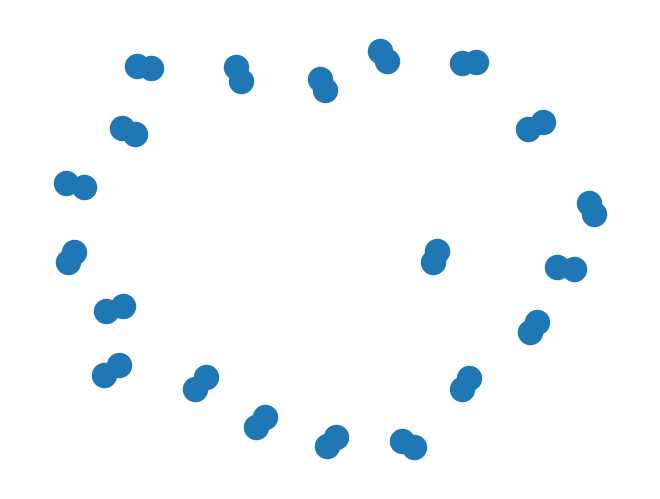

In [43]:
nx.draw(g)

In [44]:
pos = {
    node: (
        0 if node[1] == 'man' else 1,
        20 - node[0]
    )
    for node in g
}

In [45]:
color = ['red' if node[1] == 'man' else 'green' for node in g]

In [46]:
labels = {
    node: node[0]
    for node in g
}

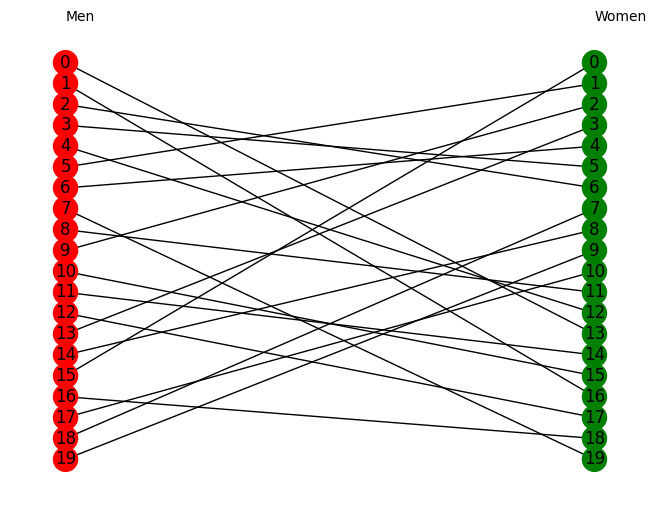

In [47]:
nx.draw(g, pos=pos, node_color=color, labels=labels)
plt.text(0, 22, 'Men')
plt.text(1, 22, 'Women')
plt.show()

In [48]:
from IPython.display import Audio
sound_file = "./sound/A_Midsummer_Night's_Dream_Op._61_Wedding_March_(Mendelssohn)_European_Archive.ogg"

In [49]:
# Audio(sound_file, autoplay=True)

In [50]:
xx, yy = np.meshgrid(range(num_men), range(num_women))

In [51]:
xx[:5, :5]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

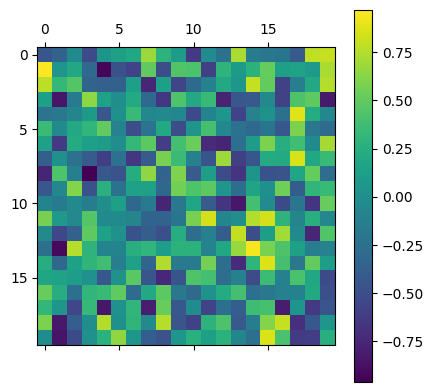

In [52]:
plt.matshow(men_preferences[yy, xx] - women_preferences[yy, xx])
plt.colorbar();